In [1]:
pwd

'/mnt/pesaranlab/People/Gino/code/DL-modulators'

In [132]:
%matplotlib inline
import numpy as np
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import os

In [133]:
pwd

'/mnt/pesaranlab/People/Gino/code/DL-modulators'

In [317]:
Ch = 1
pathHit = 'Data/Hits/1_Subject_15_Sess_{}_Ch'.format(Ch)
print(pathHit)
pathMiss = 'Data/Misses/1_Subject_15_Sess_{}_Ch'.format(Ch)
print(pathMiss)

Data/Hits/1_Subject_15_Sess_1_Ch
Data/Misses/1_Subject_15_Sess_1_Ch


In [144]:
hitIndx = 1
fnHit = os.path.join(pathHIT,"1_Subject_15_Sess_1_Ch_{}_hit.txt".format(hitIndx))
print(fnHit)

Data/Hits/1_Subject_15_Sess_1_Ch/1_Subject_15_Sess_1_Ch_1_hit.txt


numpy.ndarray

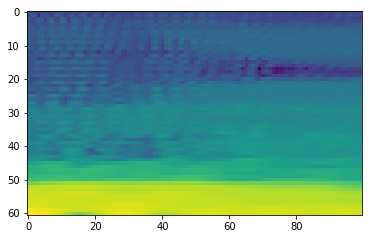

In [286]:
matrix = np.loadtxt(fnHit,dtype='f',delimiter='\t')
plt.imshow(np.flipud(matrix.transpose()))
type(matrix)

In [337]:
a = np.array([[1, 1,1],[1,1,1]])
b = np.array([[2, 2,2],[2,2,2]])
print('a dimension: ',a.shape)
print('b dimension: ',b.shape)
A = np.dstack((a, b))
print('A dimension: ',A.shape)
c = np.array([[3,3,3],[3,3,3]])
print('c dimension: ',c.shape)
B = np.dstack((A,c))
print('B dimension: ',B.shape)
print(B[:,:,0].shape)

a dimension:  (2, 3)
b dimension:  (2, 3)
A dimension:  (2, 3, 2)
c dimension:  (2, 3)
B dimension:  (2, 3, 3)
(2, 3)


### Load all the hit trials in a given electrode

In [345]:
fnHit = os.path.join(pathHIT,"1_Subject_15_Sess_1_Ch_{}_hit.txt".format(1)) # name file hit (first one)
tensor_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
#plt.imshow(np.flipud(tensor_hit.transpose()))
for indx in range(2,65):
    fnHit = os.path.join(pathHIT,"1_Subject_15_Sess_1_Ch_{}_hit.txt".format(indx)) # name file hit (following one)
    newmat_hit = np.loadtxt(fnHit,dtype='f',delimiter='\t') # load hit matrix
    tensor_hit = np.dstack((tensor_hit,newmat_hit)) # stack matrix along the 3rd dimension 

print(tensor_hit.shape)

(100, 61, 64)


### Load all the miss trials in a given electrode

In [346]:
fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_1_Ch_{}_miss.txt".format(1)) # name file miss (first one)
tensor_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load miss matrix
for indx in range(2,45):
    fnMiss = os.path.join(pathMiss,"1_Subject_15_Sess_1_Ch_{}_miss.txt".format(indx)) # name file miss (following one)
    newmat_miss = np.loadtxt(fnMiss,dtype='f',delimiter='\t') # load hit matrix
    tensor_miss = np.dstack((tensor_miss,newmat_miss)) 
    
print(tensor_miss.shape)

(100, 61, 44)


#### Merge all the hits and misses matrices together

In [394]:
tensor_trial = np.dstack((tensor_hit,tensor_miss))
print(tensor_trial.shape)

(100, 61, 108)


### Generate the labels

In [397]:
labels_hit = np.ones(64)
labels_miss = np.zeros(44)
labels = np.concatenate((labels_hit,labels_miss),axis=None)
print(labels)
print(labels.shape)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(108,)


In [142]:
matTorch = torch.from_numpy(matrix)
matTorch.shape

torch.Size([100, 61])

In [ ]:
train_data = []
for i in range(len(x_data)):
    train_data.append([x_data[i], labels[i]])

trainloader = torch.utils.data.DataLoader(train_data, shuffle=True, batch_size=100)
i1, l1 = next(iter(trainloader))
print(i1.shape)

In [138]:
class FFN(nn.Module):
    def __init__(self):
        super().__init__()
        
        # linear layers
        self.fc1 = nn.Linear(610,256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 2)
        
    def forward(self,x):
        
        # flatten the input tensor 
        x = x.view(x.shape[0],-1)
        
        # activation functions
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x